<h3>Neste notebook, analisaremos de que maneira as características das escolas afetam a nota média dos estudantes.</h3>

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

In [103]:
path = 'enem_small_data/'
file = 'Microdados_ENEM_Amostra_'

In [104]:
def display_dfs(dfs, names=[]):
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center">{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:top"> {df.head().to_html(index=False)}</td>' 
                         for df in dfs) + 
                 '</tr>')
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

In [105]:
plt.ion()
plt.rcParams['figure.figsize']  = (10, 6)

In [106]:
df = pd.read_csv(path+file+'2018.csv', sep=',', usecols=[
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO',
    'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC']).dropna()
df.loc[:,'Media'] = df[['NU_NOTA_CN', 'NU_NOTA_CH'
                                , 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].sum(axis=1)/len(df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].columns)

In [107]:
df.head()

,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Media
2,Campo Magro,PR,2.0,417.4,481.5,496.5,504.3,320.0,443.94
7,Juazeiro do Norte,CE,2.0,390.9,600.5,598.7,564.5,480.0,526.92
11,Fortaleza,CE,2.0,521.8,602.7,532.8,486.3,440.0,516.72
13,Divinópolis,MG,4.0,640.8,659.4,606.0,736.9,800.0,688.62
28,Olinda,PE,2.0,475.6,432.9,507.7,420.5,300.0,427.34


<h3>Primeiramente, analisaremos o desempenho dos estudantes com base na dependência administrativa na escola frequentada durante o Ensino Médio. São possíveis 4 casos: </h3>
<h3>1 - Federal <br>
2 - Estadual <br>
3 - Municipal <br>
4 - Privada <br></h3>

In [108]:
tipo_escola = df.groupby('TP_DEPENDENCIA_ADM_ESC', as_index=False).Media.mean().sort_values(by='Media')
rank = df.groupby('TP_DEPENDENCIA_ADM_ESC')['Media'].mean().sort_values().index
tipo_escola

,TP_DEPENDENCIA_ADM_ESC,Media
2,3.0,496.213333
1,2.0,504.372946
0,1.0,599.382326
3,4.0,606.026218


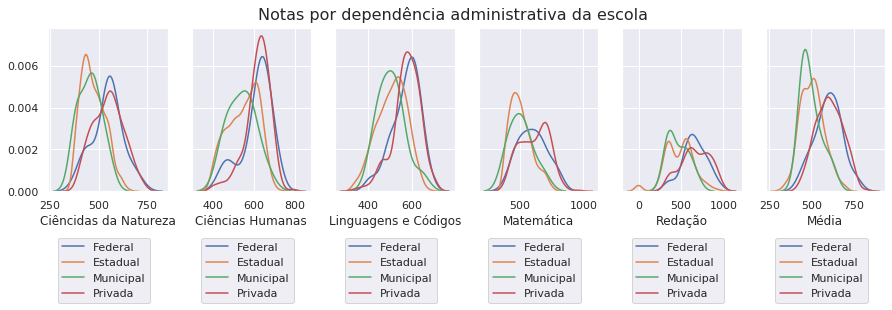

In [109]:
fig, axes = plt.subplots(1, 6, figsize=(15, 3), sharey=True)
labels = ['Ciêncidas da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Média']
columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO', 'Media']
for i in range(len(columns)):
    sns.distplot(df[df['TP_DEPENDENCIA_ADM_ESC'] == 1][columns[i]], hist = False, label = 'Federal', ax=axes[i])
    sns.distplot(df[df['TP_DEPENDENCIA_ADM_ESC'] == 2][columns[i]], hist = False, label = 'Estadual', ax=axes[i])
    sns.distplot(df[df['TP_DEPENDENCIA_ADM_ESC'] == 3][columns[i]], hist = False, label = 'Municipal', ax=axes[i])
    sns.distplot(df[df['TP_DEPENDENCIA_ADM_ESC'] == 4][columns[i]], hist = False, label = 'Privada', ax=axes[i], axlabel=labels[i])
    axes[i].legend(loc='best',  bbox_to_anchor=(0.9, -0.25))
fig.suptitle('Notas por dependência administrativa da escola', fontsize=16)
plt.show()

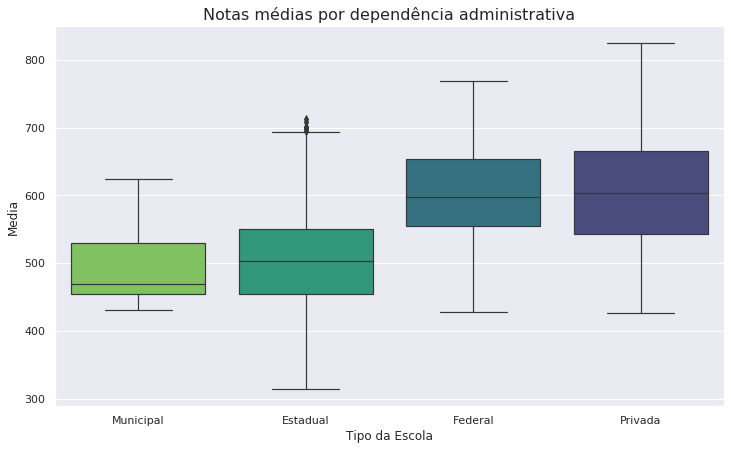

In [110]:
x_pos = [i for i, _ in enumerate(tipo_escola['TP_DEPENDENCIA_ADM_ESC'])]

sns.set(style='darkgrid')
plt.figure(figsize  = [12, 7])
sns.boxplot(x = 'TP_DEPENDENCIA_ADM_ESC', y = 'Media', data = df, palette=("viridis_r"),  linewidth=1.2, order=rank)
plt.title('Notas médias por dependência administrativa', fontsize=16)
plt.xticks(x_pos, ['Municipal', 'Estadual', 'Federal', 'Privada'])
plt.xlabel('Tipo da Escola')
plt.show()

<h3>Agora, analisaremos o desempenho dos estudantes baseado em qual unidade federativa (estado) situa-se a escola onde estudou </h3>

In [111]:
estados = df.groupby('SG_UF_ESC', as_index=False).Media.mean().sort_values(by='Media')
rank = df.groupby('SG_UF_ESC')['Media'].mean().sort_values().index
estados.head()

,SG_UF_ESC,Media
0,AC,423.780000
12,MT,486.015714
3,AP,490.605714
9,MA,495.758462
2,AM,498.410625


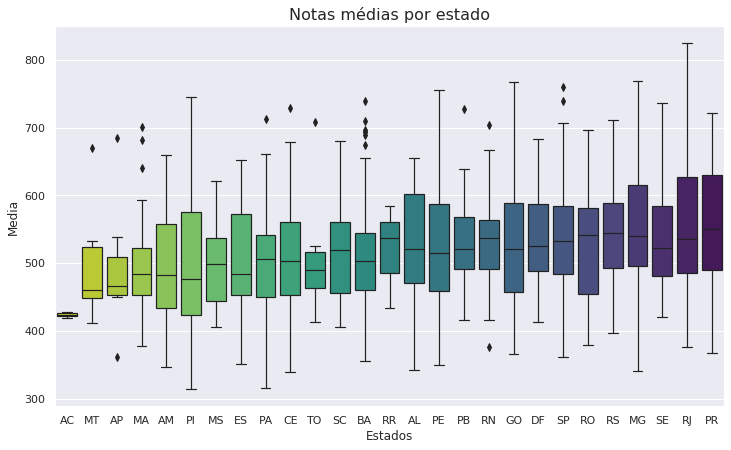

In [112]:
sns.set(style='darkgrid')
plt.figure(figsize  = [12, 7])
sns.boxplot(x = 'SG_UF_ESC', y = 'Media', data = df, palette=("viridis_r"),  linewidth=1.2, order=rank)
plt.title('Notas médias por estado', fontsize=16)
plt.xlabel('Estados')
plt.show()

<h3>Para tentarmos ser mais objetivos, 
analisaremos o desempenho dos estudantes baseado em qual região está a unidade federativa (estado)
da escola onde estudou </h3>

In [113]:
norte = ['PA', 'AM', 'RO', 'TO', 'AC', 'AP', 'RR']
nordeste = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']
centro_oeste = ['DF', 'GO', 'MT', 'MS']
sudeste = ['MG', 'RJ', 'SP', 'ES']
sul = ['SC', 'RS', 'PR']

def regiao(x):  
    if x in norte:
        return 'Norte'
    elif x in nordeste:
        return  'Nordeste'
    elif x in centro_oeste:
        return 'Centro Oeste'
    elif x in sudeste:
        return 'Sudeste'
    else:
        return 'Sul'

In [114]:
df['Regiao'] = df['SG_UF_ESC'].apply(regiao)

In [115]:
regiao = df.groupby('Regiao', as_index=False).Media.mean().sort_values(by='Media')
rank = df.groupby('Regiao')['Media'].mean().sort_values().index
regiao.head()

,Regiao,Media
2,Norte,504.566545
1,Nordeste,515.855932
0,Centro Oeste,521.480612
3,Sudeste,539.610586
4,Sul,542.066212


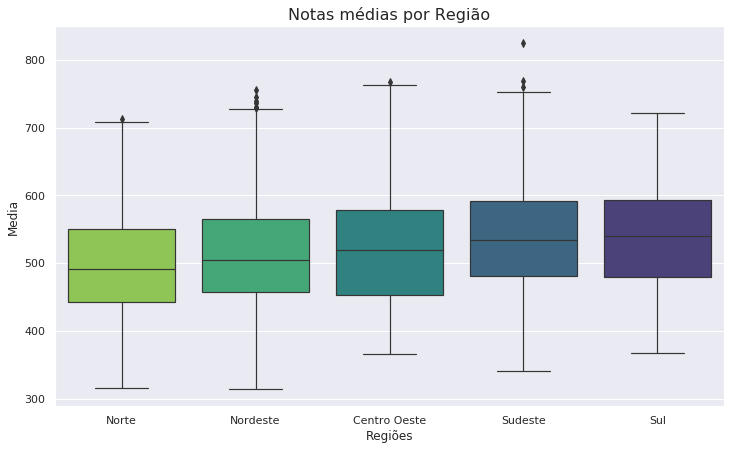

In [116]:
sns.set(style='darkgrid')
plt.figure(figsize  = [12, 7])
sns.boxplot(x = 'Regiao', y = 'Media', data = df, palette=("viridis_r"),  linewidth=1.2, order=rank)
plt.title('Notas médias por Região', fontsize=16)
plt.xlabel('Regiões')
plt.show()

<h3>Vamos, agora, observar como as notas diferem entre capitais e cidades do interior.</h3>

<h3>0 - Interior <br>
1 - Capital <br></h3>

In [123]:
capitais = ['Porto Velho', 'Manaus', 'Rio Branco', 'Campo Grande', 'Macapá', 'Brasília'
           'Boa Vista', 'Cuiabá', 'Palmas', 'Teresina', 'São Paulo', 'Rio de Janeiro', 
           'Belém', 'São Luís', 'Goiânia', 'Salvador', 'Maceió', 'Porto Alegre', 'Curitiba', 
           'Florianópolis', 'Belo Horizonte', 'Fortaleza', 'Recife', 'João Pessoa', 'Aracaju', 
           'Natal', 'Vitória']

In [124]:
def capital(x):  
    if x in capitais:
        return 1
    else:
        return 0

In [125]:
df['Capital'] = df['NO_MUNICIPIO_ESC'].apply(capital)

In [126]:
capital = df.groupby('Capital', as_index=False).Media.mean().sort_values(by='Media')
rank = df.groupby('Capital')['Media'].mean().sort_values().index
capital.head()

,Capital,Media
0,0,520.279266
1,1,552.239103


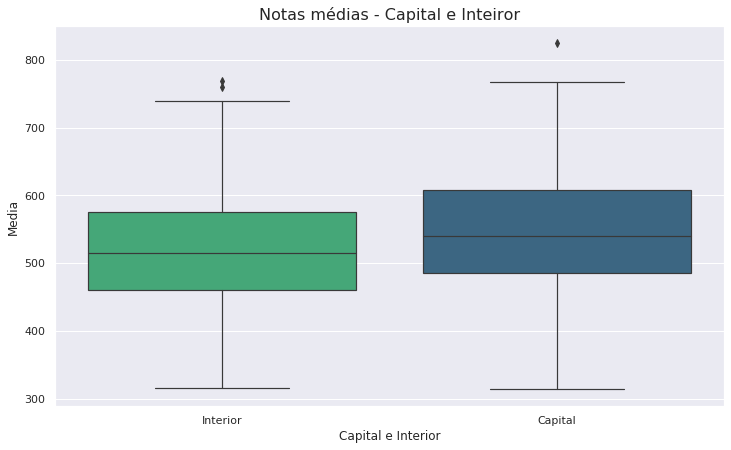

In [127]:
x_pos = [i for i, _ in enumerate(capital['Capital'])]

sns.set(style='darkgrid')
plt.figure(figsize  = [12, 7])
sns.boxplot(x = 'Capital', y = 'Media', data = df, palette=("viridis_r"),  linewidth=1.2, order=rank)
plt.title('Notas médias - Capital e Inteiror', fontsize=16)
plt.xticks(x_pos, ['Interior', 'Capital'])
plt.xlabel('Capital e Interior')
plt.show()